In [34]:
cd D:\OneDrive - business\git_clone\OpenCV-Python-Tutorial-master

D:\OneDrive - business\git_clone\OpenCV-Python-Tutorial-master


In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# 目标

- 学习图像上的算术?算?加法?减法?位?算等。
- 我们将?学习的函数与有：cv2.add()，cv2.addWeighted() 等。

## 图像加法

你可以使用函数 `cv2.add()` 将两幅图像??加法?算?当然也可以直接使
用 numpy, `res=img1+img`。两幅图像的大小，类型必须一致，或者第二个
图像可以使一个简单的标量值。

**注意?OpenCV 中的加法与 Numpy 的加法是有所不同的。OpenCV 的加法
是一种饱和操作，而 Numpy 的加法是一种模操作**

例如下面的两个例子：

In [13]:
x = np.uint8([250])
y = np.uint8([10])
print(cv2.add(x,y)) # 250+10 = 260 => 255
print(x+y) # 250+10 = 260 % 256 = 4

[[255]]
[4]


这种差别在你对两幅图像进行加法时会更加明显。OpenCV 的结果会更好
一点。所以我们尽量使用 OpenCV 中的函数。

## 图像混合

这其实也是加法，但是不同的是两幅图像的权重不同，这就会给人一种混合或者透明的感觉。图像混合的计算公式如下：

g(x)=(1-a)f<sub>0</sub>(x)+af<sub>1</sub>(x)

通过修改a的值（0→1），可以实现非常酷的混合。
现在我们把两幅图混合在一起。第一幅图的权重是0.7，第二幅图的权重是0.3。函数`cV2.addWeighted()`可以按下面的公式对图片进行混合操作。

In [30]:
# 图像混合
img1 = cv2.imread('./data/ml.png')
img2 = cv2.imread('./data/star.png')
img1.shape, img2.shape

((380, 308, 3), (193, 200, 3))

In [33]:
# 注意图像尺寸
dst = cv2.addWeighted(img1[:190, :200] , 0.7, img2[:190,: 200], 0.3, 0)  # 第一幅图的权重是 0.7 第二幅图的权重是 0.3

cv2.imshow('src1', img1[:190, :200])
cv2.imshow('src2', img2[:190,: 200])
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 按位运算

这里包括的按位操作有：AND，OR，NOT，XOR等。当我们提取图像的一部分，**选择非矩形ROI时这些操作会很有用**（下一章你就会明白）。下面的例子就是教给我们如何改变一幅图的特定区域。

我想把OpenCV的标志放到另一幅图像上。如果我使用加法，颜色会改变，如果使用混合，会得到透明效果，但是我不想要透明。如果他是矩形我可以象上一章那样使用ROI。但是他不是矩形。但是我们可以通过下面的按位运算实现：
    
## bitwise_and

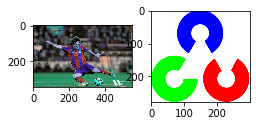

In [56]:
# Load two images
img1 = cv2.imread('./data/messi5.jpg')
img2 = cv2.imread('./data/opencv_logo.png')
# logo 原图太大了，必须比目标图像尺寸小
img2 = cv2.pyrDown(img2)

plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.show()

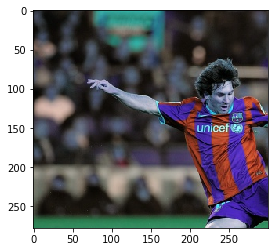

In [49]:
# I want to put logo on top-left corner, So I create a ROI
rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols]
plt.subplot(1, 1, 1)
plt.imshow(roi)
plt.show()

In [50]:
roi.shape,img2.shape, img1.shape, 

((278, 300, 3), (278, 300, 3), (342, 548, 3))

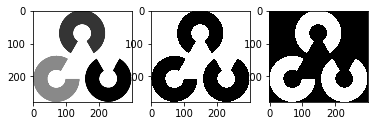

In [51]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 175, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
plt.subplot(1, 3, 1)
plt.imshow(img2gray, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(mask_inv, cmap='gray')
plt.show()

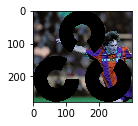

In [52]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi, roi, mask=mask)  
plt.subplot(1, 3, 1)
plt.imshow(img1_bg)
plt.show()

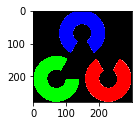

In [53]:
img2_fg = cv2.bitwise_and(img2, img2, mask=mask_inv)
plt.subplot(1, 3, 1)
plt.imshow(img2_fg)
plt.show()

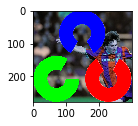

In [54]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg, img2_fg)
plt.subplot(1, 3, 1)
plt.imshow(dst)
plt.show()

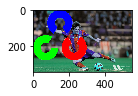

In [55]:
img1[0:rows, 0:cols] = dst
plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.show()

## 图像相减1

In [58]:
cd ch10-图像上的算术运算/

D:\OneDrive - business\git_clone\OpenCV-Python-Tutorial-master\ch10-图像上的算术运算


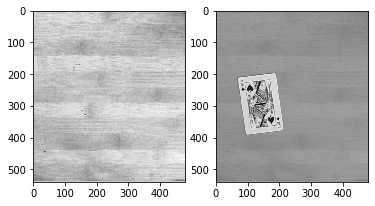

In [69]:
import cv2
import numpy as np

# img1=cv2.imread('subtract1.jpg')
img1 = cv2.imread('subtract1.jpg', 0)  #灰度图
# img2=cv2.imread('subtract2.jpg')
img2 = cv2.imread('subtract2.jpg', 0)

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.show()

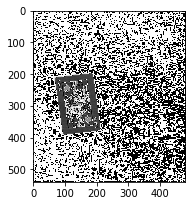

In [70]:
st=img2-img1
# st=img1-img2#相反
plt.subplot(1, 2, 2)
plt.imshow(st, cmap='gray')
plt.show()

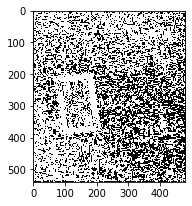

In [67]:
#效果好一点
# ret,threshold=cv2.threshold(st,0, 127, cv2.THRESH_BINARY)
ret, threshold = cv2.threshold(st, 50, 255, cv2.THRESH_BINARY)
plt.subplot(1, 2, 2)
plt.imshow(threshold, cmap='gray')
plt.show()